In [1]:
import keras, tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from IPython import display
from pathlib import Path
import os
from keras.models import load_model

2022-09-27 23:15:25.495295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 23:15:25.694409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-27 23:15:25.694448: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-27 23:15:25.748309: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-27 23:15:26.693074: W tensorflow/stream_executor/platform/de

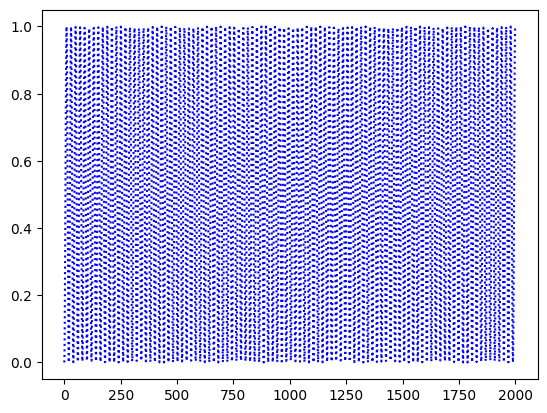

(1, 1408, 1)


In [6]:
model_dir = '/home/ubuntu/stimuli_response/models/'
file = '/home/ubuntu/stimuli_response/920nm_100mW_bin4x_100msExp_sinSquare_2secPeriod_1.csv'

start = 128
end = 1536

stimuli = []
stimuli_data = pd.read_csv(file, header = None)
stimuli_data_tuple = stimuli_data.to_numpy()
stimuli_data_array = np.asarray(stimuli_data_tuple)
stimuli.append(stimuli_data_array[:,0])
stimuli = np.asarray(stimuli)[0,:]
plt.plot(np.arange(stimuli.shape[0]),stimuli, color = 'b', linestyle='dotted')
plt.show()
stimuli = stimuli[start:end]
stimuli = np.reshape(stimuli, (1,end-start, 1))
print(stimuli.shape)


1/1 [==============================] - 5s 5s/step
(1, 1408)


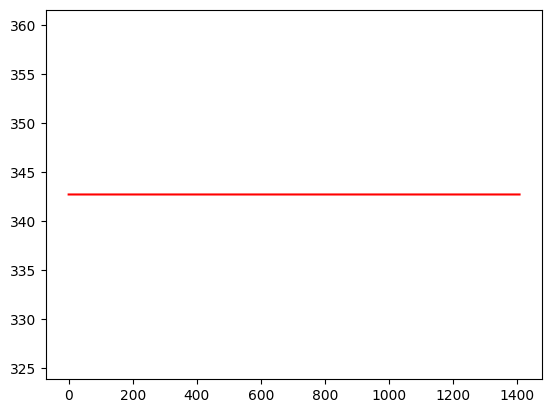

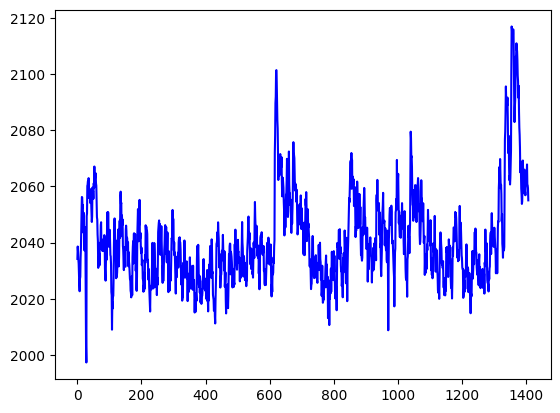

In [8]:
model = load_model(model_dir + 'ROI1.h5')

prediction = model.predict(stimuli)[:,:,0]
print(prediction.shape)
time = np.arange(prediction.shape[1])
data = prediction[0,:]    
gt = stimuli_data_array[start:end,1]

plt.plot(time,data, color = 'r')
plt.show()
plt.plot(time,gt, color = 'b')
plt.show()